In [2]:
# importing dependencies
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [86]:
from google.colab import files
upl = files.upload()

Saving test1000.jpg to test1000.jpg


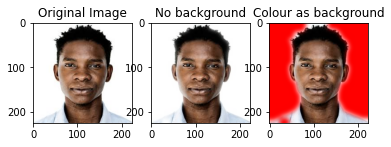

In [110]:
'''
For background removal, we aim to make use of the opencv library. 

We use the Canny function first to obtain the edges of the picture given.
We can modify the threshold values of the Canny function to control how 
sharply or aggresively does the function try to find edges. 
 
After obtaining the edges we use the contour function to find the contours
of the edges, which can be used to prepare a mask. 

A mask is basically an array of the image size, that aims to allow or let the 
foreground pass through the mask while changing the background to either 
black or the colour of the mask chosen. 

After obtaining the mask we multiply the image with the mask to seperate the 
foreground from the background.

In the following function we try to convert the background of the person
to a Pink colour. 

We can pass any colour in the MASK_COLOUR argument to obtain the image.

An added functionality aims to remove the background from the image. 
The img_transparent output is the image with the background removed.

'''
def bg_rem(img,MASK_COLOUR = (1.0,0.0,0.0),thr1 = 10,thr2 = 50):
  '''
  Inputs : 
  img : Input Image
  MASK_COLOUR : The colour of the background we wish to achieve.
  thr1 : lower threshold to find the edges of the image in Canny function
  thr2 : upper threshold to find the edges of the image in Canny function

  Output : 
  masked : Output Image
  img_transparent : Image with the background removed
  '''
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  DIL_IT = 10
  ER_IT = 10
  BLUR = 31
  ed = cv2.Canny(gr,thr1,thr2)
  #plt.imshow(ed)
  contours,contours2 = cv2.findContours(ed,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
  cont = []
  for c in contours:
   cont.append((c,cv2.isContourConvex(c),cv2.contourArea(c)))
  cont = sorted(cont,key = lambda c: c[2],reverse=True)
  #max_cont = cont[0]

  mask = np.zeros(ed.shape)
  for c in cont:
    cv2.fillConvexPoly(mask,c[0],(255))
  #plt.imshow(mask)
  mask = cv2.dilate(mask,None,iterations = DIL_IT)
  mask = cv2.erode(mask,None,iterations = ER_IT)
  mask = cv2.GaussianBlur(mask,(BLUR,BLUR),0)
  mask_stack = np.dstack([mask]*3)

  mask_stack = mask_stack.astype('float32')/255.0
  img = img.astype('float32')/255.0
  c_red,c_green,c_blue = cv2.split(img)
  img_transparent = cv2.merge((c_red,c_green,c_blue, mask.astype('float32') / 255.0))
  #plt.imshow(img_a)
  masked = (mask_stack*img) + ((1-mask_stack) * MASK_COLOUR)
  masked = (masked*255).astype('uint8')
  return masked,img_transparent

def compare_to_normal(img,img_transparent,masked):
  plt.subplot(131)
  plt.title('Original Image')
  plt.imshow(img)
  plt.subplot(132)
  plt.title('No background')
  plt.imshow(img_transparent)
  plt.subplot(133)
  plt.title('Colour as background')
  plt.imshow(masked)

test1 = cv2.cvtColor(cv2.imread('test1.jpg',cv2.IMREAD_UNCHANGED),cv2.COLOR_BGR2RGB)
bg1,bg2 = bg_rem(test1,thr1 = 10,thr2 = 100)
#plt.imshow(bg2)
compare_to_normal(test1,bg2,bg1)